# Cleaning Data

>In this notebook we will clean and handle the original data stored in *CrowdstormingDataJuly1st.csv*. The dataset consists of several soccer player-referee dyads with a group of variables, the description is available [here](https://github.com/ADAEPFL/Homework/blob/master/04%20-%20Applied%20ML/DATA.md).

### Import libraries

In [1]:
import pandas as pd                                    
import numpy as np                                     
import matplotlib.pyplot as plt                    
from sklearn import preprocessing

%matplotlib inline
import seaborn as sns

### Loading data stored in csv file

In [2]:
# Load the original dataset
df = pd.read_csv('CrowdstormingDataJuly1st.csv')

In [3]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [4]:
df.shape

(146028, 28)

The data set contains *146028* dyads of players and referees with *28* differents features.

In [5]:
df.columns

Index([u'playerShort', u'player', u'club', u'leagueCountry', u'birthday',
       u'height', u'weight', u'position', u'games', u'victories', u'ties',
       u'defeats', u'goals', u'yellowCards', u'yellowReds', u'redCards',
       u'photoID', u'rater1', u'rater2', u'refNum', u'refCountry', u'Alpha_3',
       u'meanIAT', u'nIAT', u'seIAT', u'meanExp', u'nExp', u'seExp'],
      dtype='object')

As we can see, the original dataset consists of different features related to the personal characteristics of the player or the referee and the interaction between them (i.e. cards). The dataset also contains a race implicit association test and explicit bias score for referee country. These value could impact the referee decision, that's why we uses these features in our computation and inserted new features to collate the aformentioned information.

## Remove Nan values

First, we remove all the rows incomplete values (i.e. nan values).

In [6]:
print df.isnull().any()
print df.isnull().any().value_counts()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID           True
rater1            True
rater2            True
refNum           False
refCountry       False
Alpha_3           True
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
dtype: bool
False    15
True     13
dtype: int64


As shown in the cell above, we have nan value in 13 columns. First, let's remove Nan value in *rater1* and *rater2* columns (which is the skin rating of photo).

In [7]:
nan_rater1 = len(df[df['rater1'].isnull()])
nan_rater2 = len(df[df['rater2'].isnull()])
print 'Nan value in rater1 : %d'%(nan_rater1)
print 'Nan value in rater2 : %d'%(nan_rater2)

Nan value in rater1 : 21407
Nan value in rater2 : 21407


In [8]:
df.dropna(subset=['rater1','rater2'],inplace=True)
df.shape

(124621, 28)

In [9]:
df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID          False
rater1           False
rater2           False
refNum           False
refCountry       False
Alpha_3           True
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
dtype: bool

Then, we remove Nan values in others columns *(height, weight, meanIAT, meanExp)*.

In [10]:
nan_height = len(df[df['height'].isnull()])
nan_weight = len(df[df['weight'].isnull()])
print 'Nan value in height : %d'%(nan_height)
print 'Nan value in weight : %d'%(nan_weight)

Nan value in height : 46
Nan value in weight : 753


In [11]:
df.dropna(subset=['height','weight'],inplace=True)
df.shape

(123868, 28)

In [12]:
nan_meanIAT = len(df[df['meanIAT'].isnull()])
nan_meanExp = len(df[df['meanExp'].isnull()])
print 'Nan value in height : %d'%(nan_meanIAT)
print 'Nan value in weight : %d'%(nan_meanExp)

Nan value in height : 153
Nan value in weight : 153


In [13]:
df.dropna(subset=['meanIAT','meanExp'],inplace=True)
df.shape

(123715, 28)

In [14]:
df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height           False
weight           False
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID          False
rater1           False
rater2           False
refNum           False
refCountry       False
Alpha_3          False
meanIAT          False
nIAT             False
seIAT            False
meanExp          False
nExp             False
seExp            False
dtype: bool

Finally, there still one column which contains some Nan values. The column will be dropped in the 'squash''a  function and will not form part of the computation, removing the Nan's now would lead to a 15% loss in our data set.

## Introduce new variables

We introduce new variables which take into account the mean implicit bias score and mean explicit bias score of referee country for each cards. The referee decision will be weighted according to meanIAT and meanExp of the referee country.

We introduce 2 variables for each color cards. The formula are the following :
$$C\_IAT = \sum_{i=1}^{N_{Ref}} \frac{Cards*meanIAT}{N_{games_i}}$$
$$C\_Exp = \sum_{i=1}^{N_{Ref}} \frac{Cards*meanExp}{N_{games_i}}$$

In [15]:
def weighting(list_param):
    n_cards = list_param[0]
    mean = list_param[1]
    n_games = list_param[2]
    return (n_cards*mean)/n_games

In [16]:
def compute_bias(x):
    y_card = x['yellowCards']
    r_card = x['redCards']
    yr_card = x['yellowReds']
    mean_Exp = x['meanExp']
    mean_IAT = x['meanIAT']
    n_games = x['games']
    
    parameters = [[y_card,mean_IAT,n_games],
    [r_card,mean_IAT,n_games],
    [yr_card,mean_IAT,n_games],
    [y_card,mean_Exp,n_games],
    [r_card,mean_Exp,n_games],
    [yr_card,mean_Exp,n_games]]
    
    list_results = []
    for elem in parameters:
        list_results.append(weighting(elem))
    
    return pd.Series(list_results)
    

In [17]:
results = df.apply(compute_bias,axis=1)
results.columns = ["YC_IAT","YR_IAT","RC_IAT","YC_EXP","YR_EXP","RC_EXP"]

In [18]:
df=pd.concat([df,results],axis=1)

In [19]:
df.columns

Index([u'playerShort', u'player', u'club', u'leagueCountry', u'birthday',
       u'height', u'weight', u'position', u'games', u'victories', u'ties',
       u'defeats', u'goals', u'yellowCards', u'yellowReds', u'redCards',
       u'photoID', u'rater1', u'rater2', u'refNum', u'refCountry', u'Alpha_3',
       u'meanIAT', u'nIAT', u'seIAT', u'meanExp', u'nExp', u'seExp', u'YC_IAT',
       u'YR_IAT', u'RC_IAT', u'YC_EXP', u'YR_EXP', u'RC_EXP'],
      dtype='object')

## Create our output label

We choose to create an output columns called *mean_rated* which is the mean between *rater1* and *rater2* values. Then, we drop *rater1* and *rater2* columns.

In [20]:
skin_rater_1_2 = df[['rater1','rater2']]
mean_rated = skin_rater_1_2.mean(axis=1)

In [21]:
# Difference :
df['difference_rated'] = abs(df['rater1']-df['rater2'])
# Remove the rows which the difference of rater's scores are up to 0.5
df = df[df['difference_rated']<0.5]
df['mean_rated'] = df[['rater1','rater2']].mean(axis=1)
df.drop(['rater1','rater2'], axis=1, inplace=True)

In [22]:
df['mean_rated'].value_counts()

0.250    38071
0.000    33490
0.125    17810
0.500     8906
1.000     7467
0.750     6969
0.375     5594
0.875     2832
0.625     2412
Name: mean_rated, dtype: int64

Preprocess the data with *LabelEncoder* which binds labels to integers values.

In [23]:
def split_binary(x):
    if x <= 0.5:
        return 0
    else:
        return 1

In [24]:
df['mean_rated'] = df['mean_rated'].apply(split_binary)

In [25]:
df['mean_rated'].value_counts()

0    103871
1     19680
Name: mean_rated, dtype: int64

We split the data in binary range, 0 correspond to “light skin” and 1 correspond to “dark skin”.

In [26]:
df.isnull().any()

playerShort         False
player              False
club                False
leagueCountry       False
birthday            False
height              False
weight              False
position             True
games               False
victories           False
ties                False
defeats             False
goals               False
yellowCards         False
yellowReds          False
redCards            False
photoID             False
refNum              False
refCountry          False
Alpha_3             False
meanIAT             False
nIAT                False
seIAT               False
meanExp             False
nExp                False
seExp               False
YC_IAT              False
YR_IAT              False
RC_IAT              False
YC_EXP              False
YR_EXP              False
RC_EXP              False
difference_rated    False
mean_rated          False
dtype: bool

## Merge the players rows

Then, we merge all dyads for each players. Some columns will not need to sum all variables (mean_rated,height,weight).

In [27]:
def squash(x):
    sum_columns = ['games', 'victories', 'ties','defeats', 'goals', 'gravity', 'yellowCards','yellowReds','redCards',
                   'YC_IAT','YR_IAT', 'RC_IAT', 'YC_EXP', 'YR_EXP', 'RC_EXP']
    new = pd.DataFrame()
    new.set_value(0,'mean_rated',x.iloc[0]['mean_rated'])
    new.set_value(0,'height',x.iloc[0]['height'])
    new.set_value(0,'weight',x.iloc[0]['weight'])
    new.set_value(0,'refCountry',x.iloc[0]['refCountry'])
    new.set_value(0,'refNum',x.iloc[0]['refNum'])
    new.set_value(0,'club',x.iloc[0]['club'])
    new.set_value(0,'leagueCountry',x.iloc[0]['leagueCountry'])
    for elem in x.columns:
        if elem in sum_columns:
            new.set_value(0,elem,x[elem].sum())
    return new

players = df.groupby('playerShort').apply(squash)

In [28]:
players.reset_index(inplace=True)
players.drop(['level_1','refNum','refCountry'],axis=1,inplace=True)

In [29]:
players.head()

,playerShort,mean_rated,height,weight,club,leagueCountry,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,YC_IAT,YR_IAT,RC_IAT,YC_EXP,YR_EXP,RC_EXP
0,aaron-hughes,0.0,182.0,71.0,Fulham FC,England,654.0,247.0,179.0,228.0,9.0,19.0,0.0,0.0,1.953444,0.000000,0.000000,3.148124,0.000000,0.00000
1,aaron-hunt,0.0,183.0,73.0,Werder Bremen,Germany,336.0,141.0,73.0,122.0,62.0,42.0,0.0,1.0,3.505362,0.025894,0.000000,4.867461,0.025844,0.00000
2,aaron-lennon,0.0,165.0,63.0,Tottenham Hotspur,England,412.0,200.0,97.0,115.0,31.0,11.0,0.0,0.0,0.643299,0.000000,0.000000,1.141167,0.000000,0.00000
3,aaron-ramsey,0.0,178.0,76.0,Arsenal FC,England,260.0,150.0,42.0,68.0,39.0,31.0,0.0,1.0,4.248251,0.334684,0.000000,5.822391,0.336101,0.00000
4,abdelhamid-el-kaoutari,0.0,180.0,73.0,Montpellier HSC,France,124.0,41.0,40.0,43.0,1.0,8.0,4.0,2.0,0.770171,0.133874,0.523449,0.773432,0.134440,0.61693


In [30]:
players.shape

(1562, 20)

We used the label encoding to provide a mapping for floating datapoints and string values to integers, as the classifier only accepted integer data is the input.

In [31]:
le = preprocessing.LabelEncoder()

In [32]:
le.fit(players['club'])
players['club'] = le.transform(players['club'])

In [33]:
le.fit(players['leagueCountry'])
players['leagueCountry'] = le.transform(players['leagueCountry'])

## Drop unused columns

The columns that contain *object* is not needed to train machine learning algorithm. Therefore, we drop all *object* columns.

In [34]:
players.dtypes

playerShort       object
mean_rated       float64
height           float64
weight           float64
club               int64
leagueCountry      int64
games            float64
victories        float64
ties             float64
defeats          float64
goals            float64
yellowCards      float64
yellowReds       float64
redCards         float64
YC_IAT           float64
YR_IAT           float64
RC_IAT           float64
YC_EXP           float64
YR_EXP           float64
RC_EXP           float64
dtype: object

In [35]:
players = players.select_dtypes(exclude=[object])

In [36]:
players.dtypes

mean_rated       float64
height           float64
weight           float64
club               int64
leagueCountry      int64
games            float64
victories        float64
ties             float64
defeats          float64
goals            float64
yellowCards      float64
yellowReds       float64
redCards         float64
YC_IAT           float64
YR_IAT           float64
RC_IAT           float64
YC_EXP           float64
YR_EXP           float64
RC_EXP           float64
dtype: object

In [37]:
players.shape

(1562, 19)

We store the final dataset which contains 1564 players.

In [38]:
players.head()

,mean_rated,height,weight,club,leagueCountry,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,YC_IAT,YR_IAT,RC_IAT,YC_EXP,YR_EXP,RC_EXP
0,0.0,182.0,71.0,33,0,654.0,247.0,179.0,228.0,9.0,19.0,0.0,0.0,1.953444,0.000000,0.000000,3.148124,0.000000,0.00000
1,0.0,183.0,73.0,90,2,336.0,141.0,73.0,122.0,62.0,42.0,0.0,1.0,3.505362,0.025894,0.000000,4.867461,0.025844,0.00000
2,0.0,165.0,63.0,82,0,412.0,200.0,97.0,115.0,31.0,11.0,0.0,0.0,0.643299,0.000000,0.000000,1.141167,0.000000,0.00000
3,0.0,178.0,76.0,6,0,260.0,150.0,42.0,68.0,39.0,31.0,0.0,1.0,4.248251,0.334684,0.000000,5.822391,0.336101,0.00000
4,0.0,180.0,73.0,50,1,124.0,41.0,40.0,43.0,1.0,8.0,4.0,2.0,0.770171,0.133874,0.523449,0.773432,0.134440,0.61693


In [39]:
players.groupby('mean_rated').std()

,height,weight,club,leagueCountry,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,YC_IAT,YR_IAT,RC_IAT,YC_EXP,YR_EXP,RC_EXP
mean_rated,,,,,,,,,,,,,,,,,,
0.0,6.845498,7.137752,27.864681,1.125411,142.863801,78.584792,33.972802,41.268788,42.375133,25.631276,1.419952,1.361098,2.482930,0.185106,0.188966,3.745843,0.280105,0.284506
1.0,6.230336,6.939740,24.659642,0.999840,136.108582,70.776882,33.698396,39.340629,38.312716,21.271081,1.269471,1.253978,2.281687,0.187364,0.188147,3.079269,0.262454,0.306064


## Data visualization

The histogram below shows the number of times that each feature occurred in the dataframe.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b0bfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118b304d0>]], dtype=object)

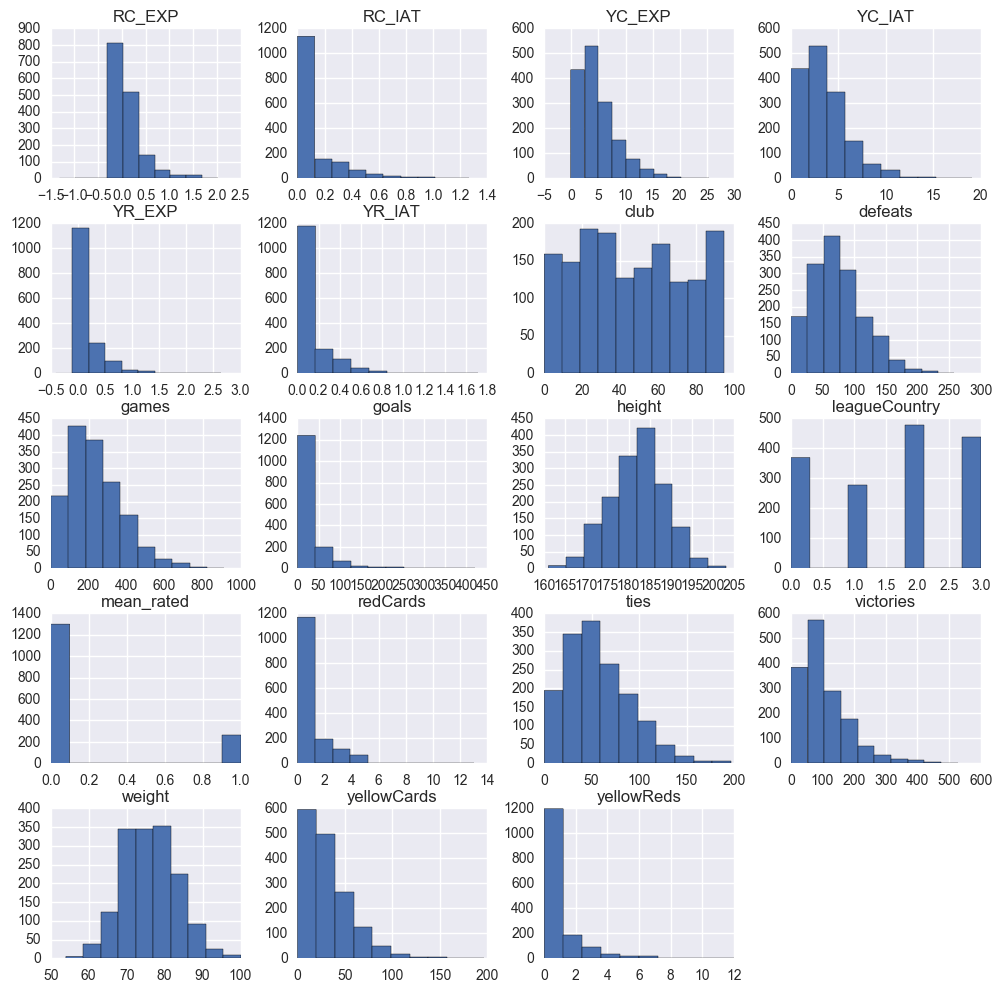

In [40]:
players.hist(figsize=(12,12))

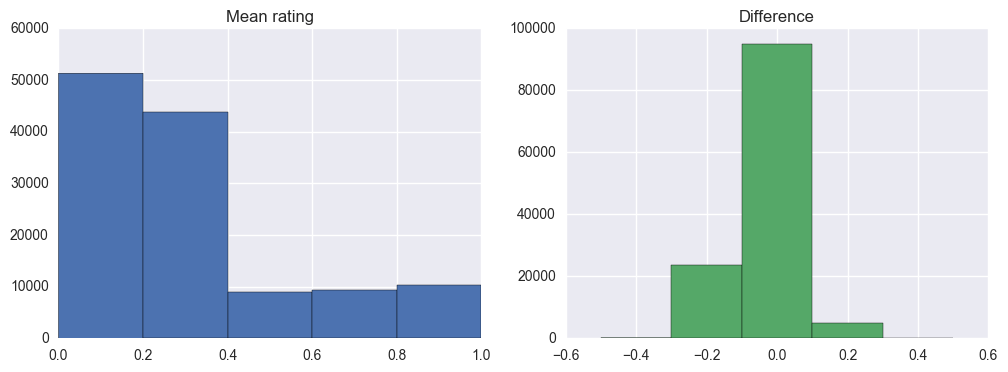

In [41]:
difference_rater = (skin_rater_1_2['rater1'] - skin_rater_1_2['rater2'])

fig, ax = plt.subplots(1,2,figsize=(12, 4))
c = sns.color_palette()
ax[0].hist(mean_rated,bins = 5, range = (0,1),color = c[0])
ax[0].set_title("Mean rating")
ax[1].hist(difference_rater, bins = 5,range = (-0.5,0.5),color = c[1])
ax[1].set_title('Difference')

In [42]:
difference_rater.value_counts()

 0.00    94903
-0.25    23746
 0.25     4902
-0.50      164
dtype: int64

The plot show the distribution of the skin rating and the difference between rater1 and rater2 scores. The difference histogram shows us a high disagreement for 164 people, so we remove them (c.f. create output label).

In [43]:
players['mean_rated'].value_counts()

0.0    1299
1.0     263
Name: mean_rated, dtype: int64

In [44]:
players.to_csv('players.csv')